# Gasification auxiliary heat requirements

In [1]:
# Fix sys path to root directory so locally defined packages can be found
import sys
sys.path.append('C:\\Users\\2270577A\\PycharmProjects\\PhD_LCA_TEA')  # fix path so I can import local functions etc.

In [2]:
import pickle

import matplotlib.pyplot as plt

from functions.MonteCarloSimulation import get_distribution_draws
from objects import gaussian_dist_maker

In [3]:
# Little data available but 10.1016/j.energy.2019.05.191 states 20% of heat used for auxiliary

heat_fraction = 0.20
heat_std = 0.20 * 0.20  # estimate std
heat_dist_maker = gaussian_dist_maker(mean=heat_fraction, std=heat_std)

heat_distribution = get_distribution_draws(distribution_maker=heat_dist_maker, length_array=1000)


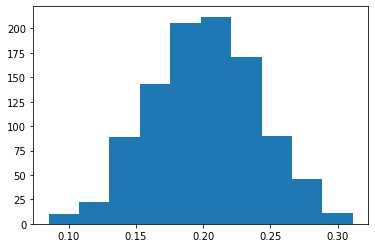

In [4]:
# Show estimated distribution

plt.hist(heat_distribution)
plt.show()

In [5]:
# Store results
with open(r"results\gasification_aux_heat_demands_results", "wb") as f:
    pickle.dump(heat_dist_maker, f)

# Also save to data folder
with open(r"C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\data\gasification_aux_heat_demands_results", "wb") as f:
    pickle.dump(heat_dist_maker, f)

In [6]:
# Also store data as toml file
import toml
from functions.general.utility import get_project_root

toml_output = {"heat_dist_maker": {"mean": heat_dist_maker.mean,
                                   "std": heat_dist_maker.std
                                   }
               }

project_root = get_project_root()
file_name = str(project_root) + r"\data\gasification_aux_heat_demands_results.toml"
with open(file_name, "w") as toml_file:
    toml.dump(toml_output, toml_file)
